In [178]:
# from twisted.conch.scripts.tkconch import frame
from ucimlrepo import fetch_ucirepo 
import ssl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [179]:
# giving an SSLCertVerificationError when trying to fetch UCI repo
ssl._create_default_https_context = ssl._create_unverified_context

# Data Preprocessing
For milestone 2, we are completing all data preprocessing operations including fetching the data, dropping unnecessary columns, encoding categorical data and normalizing continous columns. Finally, we will be splitting the data into train, test and validation sets using a 80/20 split between test and training data, and 80/20 split between split training data and a validation set (because the data set is so large we can afford to do this).

In [180]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
features = pd.DataFrame(adult.data.features)
target = pd.DataFrame(adult.data.targets)


#drop the education column as it is already represented in the education_num column
features = features.drop(columns=['education'])
data = pd.concat([features, target], axis=1)

print("before drop missing values: ", data.shape)
# drop missing values
data = data.dropna()

print("after drop missing values: ", data.shape)


before drop missing values:  (48842, 14)
after drop missing values:  (47621, 14)


In [181]:
before = {'workclass': data['workclass'].unique(),
          'marital-status': data['marital-status'].unique(),
          'occupation': data['occupation'].unique(),
          'relationship': data['relationship'].unique(),
          'race': data['race'].unique(),
          'native-country': data['native-country'].unique(),
          'income': data['income'].unique()
          }

## Categorical Data Preprocessing
using LabelEncoder to convert categorical data to numerical data

In [182]:
cate_colname = ['workclass', 'marital-status', 'occupation', 'relationship', 'native-country','race']

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

for i in cate_colname:
    data[i] = labelEncoder.fit_transform(data[i])
data.head()


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,13,2,10,5,2,Female,0,0,40,5,<=50K


In [183]:
after = {'workclass': data['workclass'].unique(),
          'marital-status': data['marital-status'].unique(),
          'occupation': data['occupation'].unique(),
          'relationship': data['relationship'].unique(),
          'race': data['race'].unique(),
          'native-country': data['native-country'].unique(),
          'income': data['income'].unique()
          }

In [184]:
# check before and after by comparing the unique values
for i in before.keys():
    print(f"col_name: {i} before: {len(before[i])} after: {len(after[i])}")

col_name: workclass before: 9 after: 9
col_name: marital-status before: 7 after: 7
col_name: occupation before: 15 after: 15
col_name: relationship before: 6 after: 6
col_name: race before: 5 after: 5
col_name: native-country before: 42 after: 42
col_name: income before: 4 after: 4


## Handling binary data

male is 0 
female is 1

income less then 50k is 0
income greater then 50k is 1

In [185]:
sex_map = {
    'Male': 0,
    'Female': 1
}

income_map = {
    '<=50K': 0,
    '>50K': 1,
    '<=50K.': 0,
    '>50K.': 1
}

# replace the values in the column
data['sex'] = data['sex'].replace(sex_map)
data['income'] = data['income'].replace(income_map)


/var/folders/45/b_y3zsxs1g35byl6x6d4f9hw0000gn/T/ipykernel_18871/1168086075.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace(sex_map)
/var/folders/45/b_y3zsxs1g35byl6x6d4f9hw0000gn/T/ipykernel_18871/1168086075.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'] = data['income'].replace(income_map)


In [186]:
continues_colname = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

from sklearn.preprocessing import StandardScaler

#normalize the continues data
scaler = StandardScaler()
data[continues_colname] = scaler.fit_transform(data[continues_colname])

## Splitting Data

In [187]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split

X = data.drop(columns=['income'])
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [188]:
import sys
from pathlib import Path

# Add the src directory to the system path
src_path = Path('./src')  # Path to the src directory relative to your notebook
sys.path.append(str(src_path.resolve()))

In [189]:
print((X['sex'] == 0).sum())

31937


Training SVM...
Epoch 0: Train Loss = 30.2252, Val Loss = 7.5583
Epoch 10: Train Loss = 27.7192, Val Loss = 6.9419
Epoch 20: Train Loss = 25.2134, Val Loss = 6.3255
Epoch 30: Train Loss = 22.7075, Val Loss = 5.7090
Epoch 40: Train Loss = 20.2016, Val Loss = 5.0926
Epoch 50: Train Loss = 17.6957, Val Loss = 4.4762
Epoch 60: Train Loss = 15.1898, Val Loss = 3.8598
Epoch 70: Train Loss = 14.6460, Val Loss = 3.7260
Epoch 80: Train Loss = 14.6460, Val Loss = 3.7260
Epoch 90: Train Loss = 14.6460, Val Loss = 3.7260
Epoch 99: Train Loss = 14.6460, Val Loss = 3.7260


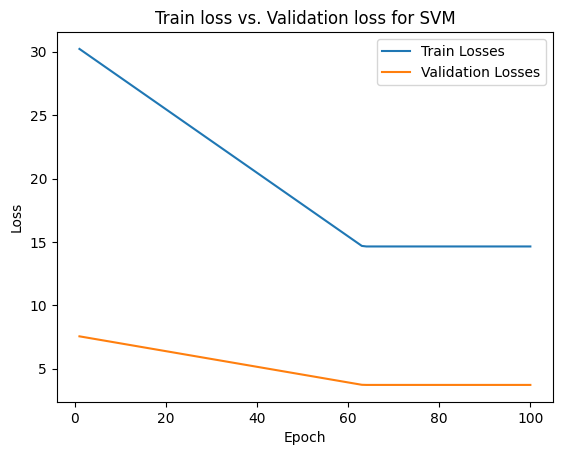

Training complete.


In [190]:
from model import svm
import importlib
importlib.reload(svm)

from model.svm import svm_

C = 0.001
learning_rate = 0.001
epoch = 100

my_svm = svm_(learning_rate=learning_rate,epoch=epoch,C_value=C,X=X_train,Y=y_train)
# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy().reshape(-1, 1)

# train model
# ensuring y is in the set {-1, 1}
y_train_preprocessed = 2 * y_train -1
print("Training SVM...")
training_losses, validation_losses = my_svm.train(X_train, y_train_preprocessed)
print("Training complete.")

In [191]:
# testing the model
print("Evaluating SVM...")
y_test_preprocessed = 2 * y_test -1
y_pred = my_svm.evaluate(X_test,y_test_preprocessed)


Evaluating SVM...
Accuracy on test dataset: 0.752755905511811


Training Logistic Regression Model
Epoch: 1: train Loss: 0.6931471805599467, Validation Loss: 0.6931471805599467
Epoch: 101: train Loss: 0.5466174898230871, Validation Loss: 0.5512382346414255
Epoch: 201: train Loss: 0.535809586485702, Validation Loss: 0.5407940523161305
Epoch: 301: train Loss: 0.5266274385752403, Validation Loss: 0.5319378376888003
Epoch: 401: train Loss: 0.5186941613280657, Validation Loss: 0.5242967355492428
Epoch: 501: train Loss: 0.5117497634065379, Validation Loss: 0.5176151322356476
Epoch: 601: train Loss: 0.505608535298446, Validation Loss: 0.5117114062871817
Epoch: 701: train Loss: 0.5001331207163392, Validation Loss: 0.5064517786332857
Epoch: 801: train Loss: 0.4952186922013235, Validation Loss: 0.5017344584840907
Epoch: 901: train Loss: 0.4907830954837476, Validation Loss: 0.49747983511924126
Epoch: 1001: train Loss: 0.4867605255986569, Validation Loss: 0.49362422503193026
Epoch: 1101: train Loss: 0.48309732905163105, Validation Loss: 0.4901157456438012
Epoc

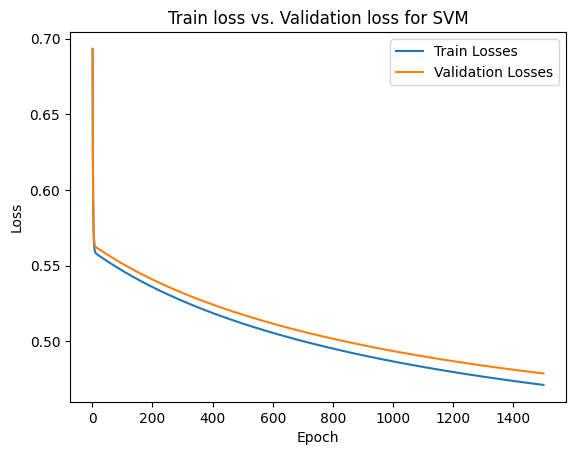

In [212]:
# Logistic Regression with Regularization
from model import LogisticRegression
import importlib
importlib.reload(LogisticRegression)

from model.LogisticRegression import LogisticRegression_


lr_learning_rate = 0.001
lr_epoch = 1500
c = 0.001

lr = LogisticRegression_(c,lr_learning_rate, lr_epoch, X_train, y_train)

print("Training Logistic Regression Model")
lr.train()

In [213]:
print("Evaluating LogisticRegression ...")
y_pred = lr.evaluate(X_test, y_test)

Evaluating LogisticRegression ...
Accuracy: 0.7562204724409449


## Bias Fairness Strategy
Here we measure the bias within sex and race (two sensitive columns)

In [ ]:
from sklearn.metrics import confusion_matrix

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred).reset_index(drop=True)

male_mask = X_test['sex'] == 0
female_mask = X_test['sex'] == 1

y_test_male = y_test[male_mask]
y_pred_male = y_pred[male_mask]

cm = confusion_matrix(y_test_male, y_pred_male)

tn, fp, fn, tp = cm.ravel()

male_tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
male_fpr = fp / (fp + tn) if (fp + tn) > 0 else 0 
print("Male TPR:", male_tpr)
print("Male FPR:", male_fpr)


Male TPR: 0.10324189526184539
Male FPR: 0.029378273741744478


In [215]:
def measure_race_bias(y_pred, y_test, X_test):
    unique_races = X_test['race'].unique()

    race_map = {
        1: 'White',
        0: 'Black',
        4: 'Amer-Indian-Eskimo',
        2: 'Asian-Pac-Islander',
        3: 'Other'
    }

    for race in unique_races:
        race_mask = X_test['race'] == race
        
        y_test_race = y_test[race_mask]
        y_pred_race = y_pred[race_mask]
        
        cm = confusion_matrix(y_test_race, y_pred_race)
        
        tn, fp, fn, tp = cm.ravel()
        
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0 
        print(f"Race {race_map[race]}: TPR = {tpr:.2f}")

measure_race_bias(y_pred, y_test, X_test)

Race Amer-Indian-Eskimo: TPR = 0.09
Race Asian-Pac-Islander: TPR = 0.05
Race White: TPR = 0.36
Race Black: TPR = 0.00
Race Other: TPR = 0.17


### Implementing bias mitigation strategy
We then want to implement a bias mitigation strategy for race, where we use class balancing within sensitive groups.

Epoch: 1: train Loss: 0.6931471805599458, Validation Loss: 0.693147180559946
Epoch: 101: train Loss: 0.6673529360908859, Validation Loss: 0.6685693181796346
Epoch: 201: train Loss: 0.6483959697189509, Validation Loss: 0.6505856815373137
Epoch: 301: train Loss: 0.6336992864648207, Validation Loss: 0.6367398247915368
Epoch: 401: train Loss: 0.6218699743842051, Validation Loss: 0.6256530938249385
Epoch: 501: train Loss: 0.6120883119216647, Validation Loss: 0.616518356277738
Epoch: 601: train Loss: 0.6038373437082905, Validation Loss: 0.6088304510240374
Epoch: 701: train Loss: 0.5967705096023987, Validation Loss: 0.6022537287893791
Epoch: 801: train Loss: 0.5906438379335539, Validation Loss: 0.5965540505864487
Epoch: 901: train Loss: 0.5852789513463755, Validation Loss: 0.5915617063271202
Epoch: 1001: train Loss: 0.5805415358062638, Validation Loss: 0.5871499046681544
Epoch: 1101: train Loss: 0.5763280571288989, Validation Loss: 0.5832215765701625
Epoch: 1201: train Loss: 0.572557155259695

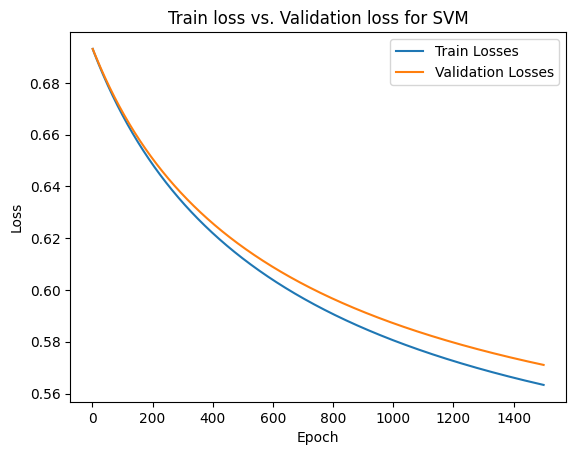

In [ ]:
# Balance the data and then refeed the new mitigated X and Y into the logisitc regression model to retrain
from sklearn.utils import resample

def balance_data(X_train, y_train, sensitive_column):
    train_data = pd.concat([X_train, y_train], axis=1)

    balanced_data = []
    for group in train_data[sensitive_column].unique():
        group_data = train_data[train_data[sensitive_column] == group]
        class_0 = group_data[group_data['income'] == 0]
        class_1 = group_data[group_data['income'] == 1]

        min_size = min(len(class_0), len(class_1))
        balanced_group = pd.concat([
            resample(class_0, replace=True, n_samples=min_size, random_state=42),
            resample(class_1, replace=True, n_samples=min_size, random_state=42)
        ])
        balanced_data.append(balanced_group)

    balanced_data = pd.concat(balanced_data)
    return balanced_data.drop('income', axis=1), balanced_data['income']

X_train_mitigated, y_train_mitigated = balance_data(X_train, y_train, 'race')
lr.set_input(X_train_mitigated)
lr.set_target(y_train_mitigated)

lr.train()


In [ ]:
# Then gather the new predicted y values and remeasure the Bias 
y_pred_mitigated = lr.evaluate(X_test, y_test)
measure_race_bias(y_pred_mitigated, y_test, X_test)

Accuracy: 0.7053018372703412
Race Amer-Indian-Eskimo: TPR = 0.78
Race Asian-Pac-Islander: TPR = 0.77
Race White: TPR = 0.93
Race Black: TPR = 0.73
Race Other: TPR = 0.67


## Random Forest Classifier
train and test three different models with the following parameters:
1. forest_size = 100, max_tree_depth = 7
2. forest_size = 100, max_tree_depth = 10
3. forest_size = 200, max_tree_depth = 7

### Validated using KFold Cross Validation

In [92]:
%load_ext autoreload
%autoreload 2

#Random Forest Classifier 1

from model.random_forest import random_forest
from sklearn.model_selection import KFold

print("Performing KFold Cross Validation on Random Forest Classifier...")

K = 5

# Initialize KFold object
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Store cross-validation scores
cv_scores = []
entropy_losses = []

X_npy = X.values
y_npy = y.values


# Iterate through the K folds
for train_index, val_index in kf.split(X_npy):
    X_train, X_val = X_npy[train_index], X_npy[val_index]
    y_train, y_val = y_npy[train_index], y_npy[val_index]
    
    # Initialize RF Classifier
    rf = random_forest(forest_size=100, max_tree_depth=7)
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred, y_pred_probabilities = rf.predict(X_test.values)
    
    accuracy_score, entropy_loss = rf.evaluate(y_test_preprocessed, y_pred, y_pred_probabilities)
    
    # Append the score to the list
    cv_scores.append(accuracy_score)
    entropy_losses.append(entropy_loss)

# Compute the average score across all folds
average_score = np.mean(cv_scores)
average_loss = np.mean(entropy_losses)

print(f'Average accuracy score across {K} folds: {average_score:.4f}')

print(f"Average entropy loss across {K} folds: {average_loss}")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Performing KFold Cross Validation on Random Forest Classifier...
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
agg

In [95]:
%load_ext autoreload
%autoreload 2

#Random Forest Classifier 1

from model.random_forest import random_forest
from sklearn.model_selection import KFold

print("Performing KFold Cross Validation on Random Forest Classifier...")

K = 5

# Initialize KFold object
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Store cross-validation scores
cv_scores = []
entropy_losses = []

X_npy = X.values
y_npy = y.values


# Iterate through the K folds
for train_index, val_index in kf.split(X_npy):
    X_train, X_val = X_npy[train_index], X_npy[val_index]
    y_train, y_val = y_npy[train_index], y_npy[val_index]
    
    # Initialize RF Classifier
    rf = random_forest(forest_size=100, max_tree_depth=10)
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred, y_pred_probabilities = rf.predict(X_test.values)
    
    accuracy_score, entropy_loss = rf.evaluate(y_test_preprocessed, y_pred, y_pred_probabilities)
    
    # Append the score to the list
    cv_scores.append(accuracy_score)
    entropy_losses.append(entropy_loss)

# Compute the average score across all folds
average_score = np.mean(cv_scores)
average_loss = np.mean(entropy_losses)

print(f'Average accuracy score across {K} folds: {average_score:.4f}')

print(f"Average entropy loss across {K} folds: {average_loss}")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Performing KFold Cross Validation on Random Forest Classifier...
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.


TypeError: random_forest.evaluate() takes 3 positional arguments but 4 were given

In [ ]:
%load_ext autoreload
%autoreload 2

#Random Forest Classifier 2

from model.random_forest import random_forest
from sklearn.model_selection import KFold

print("Performing KFold Cross Validation on Random Forest Classifier...")

K = 5

# Initialize KFold object
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Store cross-validation scores
cv_scores = []
entropy_losses = []

X_npy = X.values
y_npy = y.values


# Iterate through the K folds
for train_index, val_index in kf.split(X_npy):
    X_train, X_val = X_npy[train_index], X_npy[val_index]
    y_train, y_val = y_npy[train_index], y_npy[val_index]
    
    # Initialize RF Classifier
    rf = random_forest(forest_size=200, max_tree_depth=10)
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred, y_pred_probabilities = rf.predict(X_test.values)
    
    accuracy_score, entropy_loss = rf.evaluate(y_test_preprocessed, y_pred, y_pred_probabilities)
    
    # Append the score to the list
    cv_scores.append(accuracy_score)
    entropy_losses.append(entropy_loss)

# Compute the average score across all folds
average_score = np.mean(cv_scores)
average_loss = np.mean(entropy_losses)

print(f'Average accuracy score across {K} folds: {average_score:.4f}')

print(f"Average entropy loss across {K} folds: {average_loss}")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Performing KFold Cross Validation on Random Forest Classifier...
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  9000  samples.
fitting model...
aggregated predictions for  0  samples.
aggregated predictions for  3000  samples.
agg